In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Let us determine if a simple pendulum driven dc generator can be used in our application.
# The target average power output is 10 mW.
# The pendulum will be driven by the rotation of the wearers head. It will then drive a small
# dc motor through a large gearing ratio.

# The pendulum can have a maximum arm length of 4cm. 

In [6]:
# Taking a Portescap Athlonix 17DCT 26P1/P2 motor as a reference with the following figures:
# Motor Diameter (mm): 17
# Shaft Play - Axial (mm): 0.15
# Shaft Play - Radial (mm): 0.03
# Back EMF Constant (V/1000 rpm): 3.65
# Continuous Current, Max (A): 0.17
# Continuous Torque, Max (mNm): 6.01
# Mechanical Time Constant (ms): 6.22
# Motor Regulation (10^3/Nms): 62
# No-Load Current, Typical (mA): 2.6
# No-Load Speed (rpm): 9800
# Nominal Voltage (V): 36
# Rotor Inertia (gcm^2): 1
# Torque Constant (mNm/A): 34.89
# Weight (g): 27
# Ambient Operating Temperature, Max: Rotor (°C): 100
# Ambient Operating Temperature Range: Motor (°C): -30 to 85
# Continuous Speed, Max (rpm): 10000
# Efficiency (%): 86
# Friction Torque (mNm): 0.08
# Output Power (W): 4.7
# Shaft Load, Max - Axial (5 mm. from bearing) (N): 1.5
# Shaft Load, Max - Radial (5 mm. from bearing) (N): 100
# Stall Torque at Nominal Voltage (mNm): 16.43
# Terminal Resistance (Ohm): 76.02
# Thermal Resistance (rotor/body) (°C/W): 6 / 25


2.6e-3 * 36

0.09359999999999999

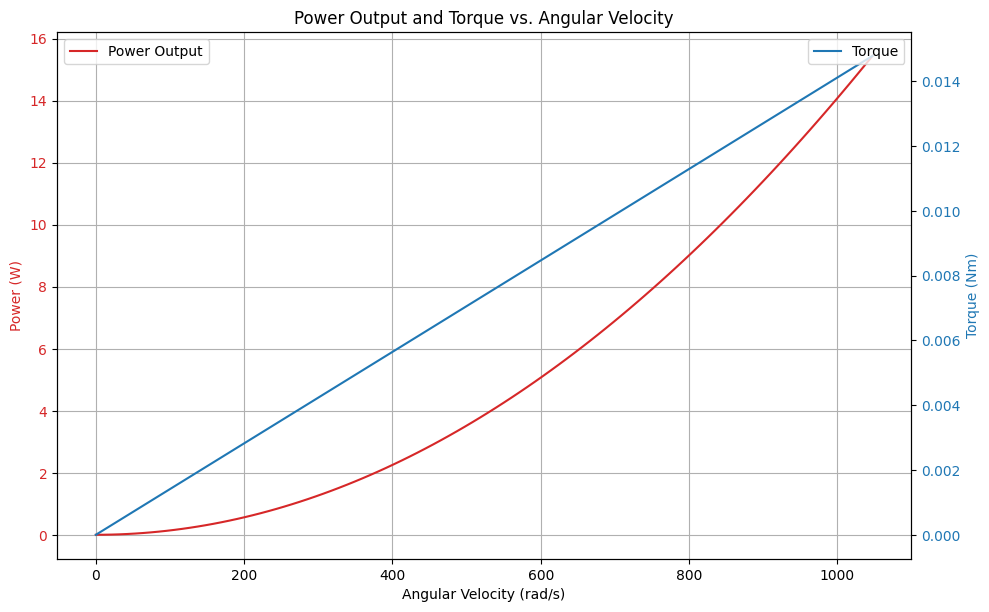

In [7]:
# Constants from the motor specifications
k_e = 0.0348  # Back EMF constant in V·s/rad
k_t = 0.03489  # Torque constant in Nm/A
R_m = 76.02   # Internal resistance in Ohms
max_anguler_velocity = 10000 * 2 * np.pi / 60  # Maximum angular
R_load = 10   # Load resistance in Ohms

def calculate_power_and_torque(omega):
    V_emf = k_e * omega
    I = V_emf / (R_load + R_m)
    P = V_emf * I
    T = k_t * I
    return P, T

# Range of angular velocities (rad/s)
omega_range = np.linspace(0, max_anguler_velocity, 100) 

# Calculate power and torque for each angular velocity
power_values = []
torque_values = []
for omega in omega_range:
    P, T = calculate_power_and_torque(omega)
    power_values.append(P)
    torque_values.append(T)

# Plotting the power and torque versus angular velocity
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Angular Velocity (rad/s)')
ax1.set_ylabel('Power (W)', color=color)
ax1.plot(omega_range, power_values, label='Power Output', color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper left')
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Torque (Nm)', color=color)  # we already handled the x-label with ax1
ax2.plot(omega_range, torque_values, label='Torque', color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='upper right')

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Power Output and Torque vs. Angular Velocity')
plt.show()

In [8]:
# Assume 10g mass with a lever arm of 4cm
# What is the torque generated by a perpendicular force equal to the weight of the mass?
m = 10e-3  # Mass in kg
r = 4e-3  # Lever arm in meters
g = 9.81  # Acceleration due to gravity in m/s^2
T = m * g * r
T

0.002 * 298


0.596

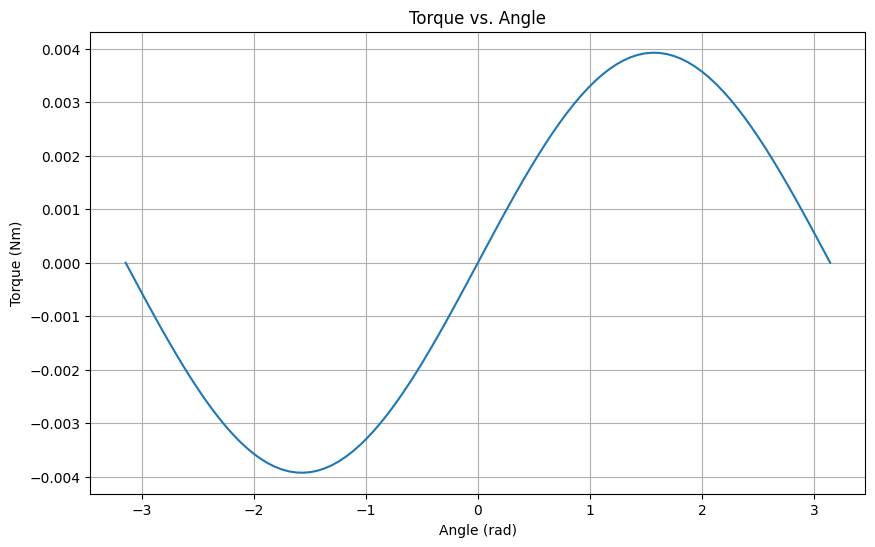

In [14]:
lever_arm = 0.02
mass = 0.02
g = 9.81

# Plot the torque generated by a mass of 10g with a lever arm of 1cm as a function of angle.
omega = np.linspace(-np.pi, np.pi , 100)
plt.figure(figsize=(10, 6))
plt.plot(omega, mass * g * lever_arm * np.sin(omega))
plt.xlabel('Angle (rad)')
plt.ylabel('Torque (Nm)')
plt.title('Torque vs. Angle')
plt.grid(True)
plt.show()

In [15]:
# Assuming a 17g DC motor with the following figures:
# Type 130 motor
# Operating voltage: 1.5 to 6V DC
# Operating current: 160mA at 3V, 200mA at 6V
# Motor diameter: 20mm (curbed side), 15mm (flat side)
# Motor height: 25mm
# Shaft diameter: 2.0 mm
# Shaft length: 9 mm
# Speed: 12500 RPM (at 6V)
# Weight: 17g

rpm = 4000
back_emf = 0.0046 * rpm * 2 * np.pi / 60
current_at_6v = 0.2
resistance = 6 / current_at_6v
power = back_emf**2 / resistance
print("Power is: " + str(power))
print("Back EMF is: " + str(back_emf))

torque_constant = 0.0046
torque = torque_constant * back_emf / resistance
print("Torque is: " + str(torque))

0.000166*50

Power is: 0.12375752837158564
Back EMF is: 1.9268434942017396
Torque is: 0.00029544933577760004


0.0083